<a href="https://colab.research.google.com/github/decadeofdata/Covid-data-science/blob/main/PerYear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Comparing covid detahs in Ireland per year.

In [1]:
import pandas as pd
import seaborn as sns
import plotly
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Mount Google drive and data
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [49]:
covid_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/COVID/Data/owid-covid-data.csv", parse_dates=['date'])
covid_df = covid_df.sort_values(by='date')
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229676 entries, 7710 to 229675
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    229676 non-null  object        
 1   continent                                   216704 non-null  object        
 2   location                                    229676 non-null  object        
 3   date                                        229676 non-null  datetime64[ns]
 4   total_cases                                 216690 non-null  float64       
 5   new_cases                                   216399 non-null  float64       
 6   new_cases_smoothed                          215203 non-null  float64       
 7   total_deaths                                197494 non-null  float64       
 8   new_deaths                                  197432 non-null  float64   

In [50]:
#Ireland
ire_df = covid_df.loc[covid_df['location'] == 'Ireland']
ire_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
98524,IRL,Europe,Ireland,2020-02-29,1.0,1.0,NaN,NaN,NaN,NaN,...,25.7,NaN,2.96,82.3,0.955,4986526.0,-412.2,-6.83,-3.89,-82.66276
98525,IRL,Europe,Ireland,2020-03-01,1.0,0.0,NaN,NaN,NaN,NaN,...,25.7,NaN,2.96,82.3,0.955,4986526.0,NaN,NaN,NaN,NaN
98526,IRL,Europe,Ireland,2020-03-02,1.0,0.0,NaN,NaN,NaN,NaN,...,25.7,NaN,2.96,82.3,0.955,4986526.0,NaN,NaN,NaN,NaN
98527,IRL,Europe,Ireland,2020-03-03,2.0,1.0,NaN,NaN,NaN,NaN,...,25.7,NaN,2.96,82.3,0.955,4986526.0,NaN,NaN,NaN,NaN
98528,IRL,Europe,Ireland,2020-03-04,6.0,4.0,NaN,NaN,NaN,NaN,...,25.7,NaN,2.96,82.3,0.955,4986526.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,IRL,Europe,Ireland,2022-10-19,1670377.0,2076.0,296.571,8010.0,22.0,3.143,...,25.7,NaN,2.96,82.3,0.955,4986526.0,NaN,NaN,NaN,NaN
99488,IRL,Europe,Ireland,2022-10-20,1670377.0,NaN,NaN,8010.0,NaN,NaN,...,25.7,NaN,2.96,82.3,0.955,4986526.0,NaN,NaN,NaN,NaN
99489,IRL,Europe,Ireland,2022-10-21,1670377.0,NaN,NaN,8010.0,NaN,NaN,...,25.7,NaN,2.96,82.3,0.955,4986526.0,NaN,NaN,NaN,NaN
99490,IRL,Europe,Ireland,2022-10-22,1670377.0,NaN,NaN,8010.0,NaN,NaN,...,25.7,NaN,2.96,82.3,0.955,4986526.0,NaN,NaN,NaN,NaN


In [51]:
#Group by year.
ire_year_df = ire_df.groupby(pd.Grouper(key='date', axis=0, freq='1Y')).sum()
ire_year_df

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-12-31,10464787.0,91779.0,87554.136,460986.0,2253.0,2204.717,2.098613e+06,18405.396,17558.151,92446.316,...,7889.9,0.0,908.72,25266.1,293.185,1.530863e+09,4119.6,14.73,28.88,826.146299
2021-12-31,119447207.0,699686.0,652485.290,1758645.0,3678.0,3688.568,2.395399e+07,140315.315,130849.669,352679.388,...,9380.5,0.0,1080.40,30039.5,348.575,1.820082e+09,20859.8,41.58,93.03,4183.232976
2022-12-31,439686789.0,887350.0,929759.858,2120017.0,2098.0,2091.716,8.817497e+07,177949.535,186454.433,425149.102,...,7607.2,0.0,876.16,24360.8,282.680,1.476012e+09,27069.8,35.35,58.42,5428.588962


In [52]:
# Change index to new coloumn 
ire_year_df.reset_index(inplace=True)


In [59]:
# Change date to year
ire_year_df['date'] = pd.to_datetime(ire_year_df['date'])
ire_year_df['date'] = ire_year_df['date'].dt.strftime('%Y')
ire_year_df

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,2020,10464787.0,91779.0,87554.136,460986.0,2253.0,2204.717,2.098613e+06,18405.396,17558.151,...,7889.9,0.0,908.72,25266.1,293.185,1.530863e+09,4119.6,14.73,28.88,826.146299
1,2021,119447207.0,699686.0,652485.290,1758645.0,3678.0,3688.568,2.395399e+07,140315.315,130849.669,...,9380.5,0.0,1080.40,30039.5,348.575,1.820082e+09,20859.8,41.58,93.03,4183.232976
2,2022,439686789.0,887350.0,929759.858,2120017.0,2098.0,2091.716,8.817497e+07,177949.535,186454.433,...,7607.2,0.0,876.16,24360.8,282.680,1.476012e+09,27069.8,35.35,58.42,5428.588962


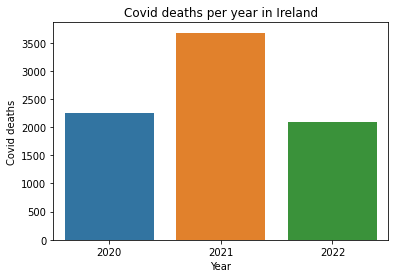

In [78]:
sns.barplot(data=ire_year_df, x='date', y="new_deaths")
plt.title('Covid deaths per year in Ireland')
plt.xlabel('Year')
plt.ylabel('Covid deaths')
plt.show()

In [65]:
ire_year_df['new_deaths']

0    2253.0
1    3678.0
2    2098.0
Name: new_deaths, dtype: float64